In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

In [2]:
import matplotlib as mpl

# 2 지도 학습

## 2.1 분류와 회귀

### 분류
+ 클래스 레이블 선택
  + 이진 분류, 다중 분류

## 2.2 일반화, 과대적합, 과소적합

+ 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다.
+ 과대적합 : train 데이터에 최적화 되어 있다.
+ 과소적합 : train 데이터의 특성을 잡아내지 못했다.

## 2.3 지도학습 알고리즘

### 2.3.1 예베에 사용할 데이터셋

+ 이진 분류 데이터셋(forge)

X.shape : (26, 2)


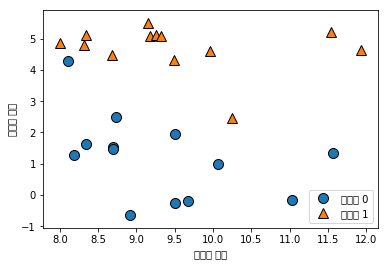

In [5]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", '클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape : {}'.format(X.shape))

+ 회귀 데이터셋(wave)

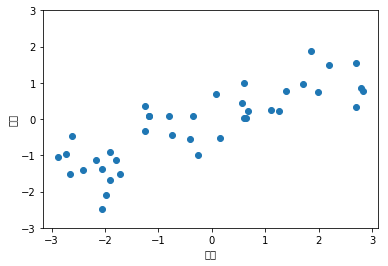

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

+ 위스콘신 유방암 데이터셋

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key() : \n{}".format(cancer.keys()))

cancer.key() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [13]:
print('유방암 데이터의 형태 : {}'.format(cancer.data.shape))

유방암 데이터의 형태 : (569, 30)


In [15]:
print('클래스 별 샘플의 개수 : {}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스 별 샘플의 개수 : {'malignant': 212, 'benign': 357}


In [18]:
print('특성 이름 : {}'.format(cancer.feature_names))

특성 이름 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
pd.DataFrame(data=cancer.data, columns=cancer.feature_names).tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


+ 보스턴 주택가격

In [26]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태 : {}'.format(boston.data.shape))

데이터의 형태 : (506, 13)


+ 보스턴 주택가격(특성공학)

In [27]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


### 2.3.2 K-최근접 이웃(k-NN)